### SIFT : Scale Invariant Feature Transform
used for feature detection and description. It detects distinctive key points or features in an image that are robust to changes in scale, rotation, and affine transformations.

##### SIFT algorithm helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariants 

### Steps
##### Scale-space peak selection: Potential location for finding features.
##### Keypoint Localization: Accurately locating the feature keypoints.
##### Orientation Assignment: Assigning orientation to keypoints.
##### Keypoint descriptor: Describing the keypoints as a high dimensional vector.
##### Keypoint Matching

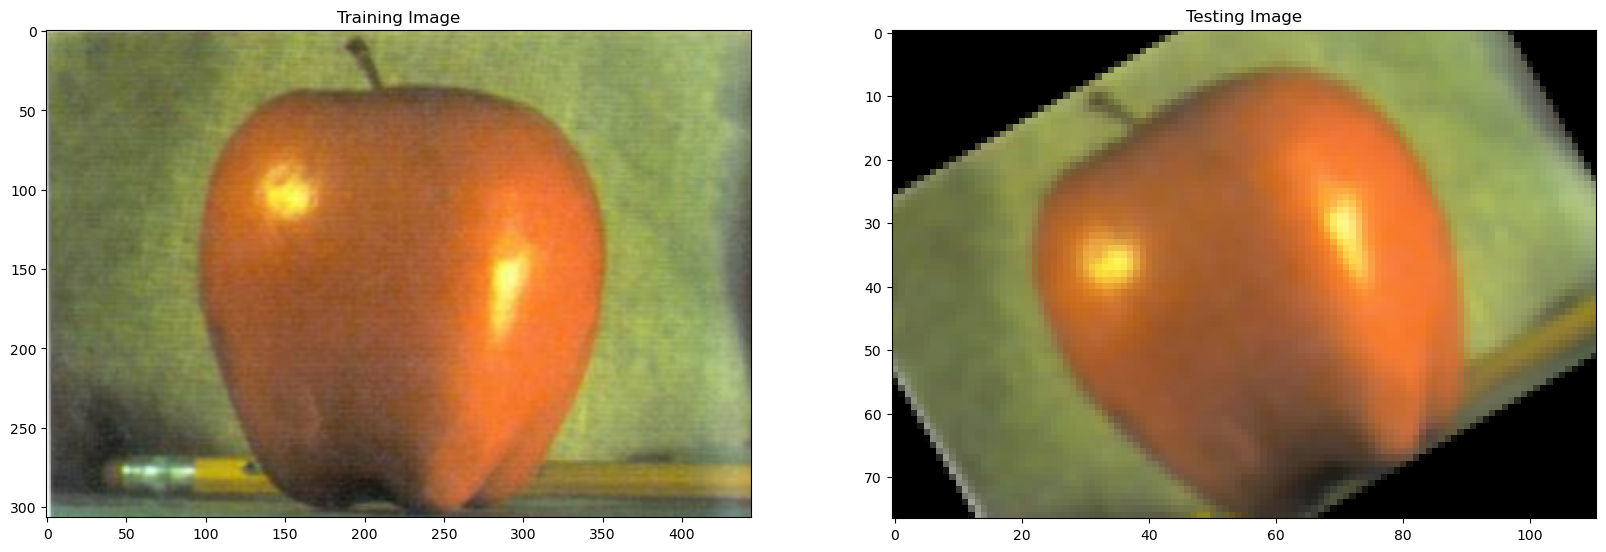

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#Load the image
image1 = cv2.imread('./images/apple.png')
training_image = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
t_gray = cv2.cvtColor(t_img,cv2.COLOR_RGB2GRAY)
#create the test image by adding scale and rotational invariance
test_image = cv2.pyrDown(t_img)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),30,1)
test_image = cv2.warpAffine(test_image,rotation_matrix,(num_cols, num_rows))
test_gray = cv2.cvtColor(test_image,cv2.COLOR_RGB2GRAY)
# display images
fx , plots = plt.subplots(1,2,figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

### Detect keypoints and Create Descriptor

Number of Keypoints Detected In The Training Image:  61
Number of Keypoints Detected In The Query Image:  23


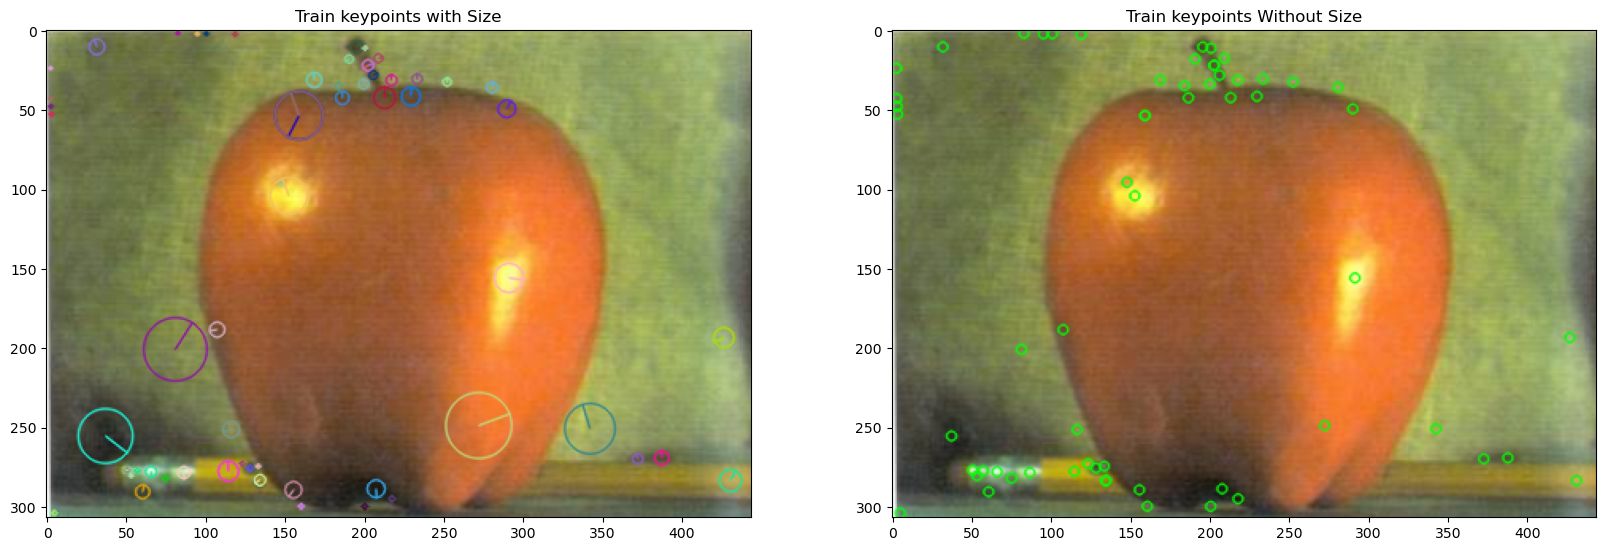

In [13]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(t_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0,255,0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#DISPLAY image 
fx, plots = plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Train keypoints with Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

### Matching Keypoints

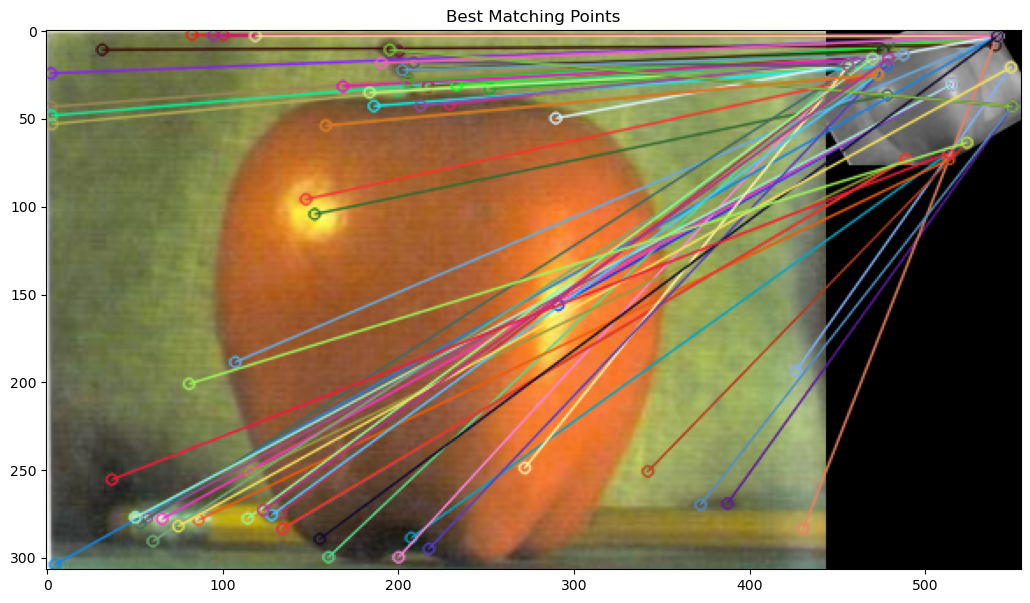


Number of Matching Keypoints Between The Training and Query Images:  61


In [17]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)
matches = bf.match(train_descriptor, test_descriptor)
matches = sorted(matches, key = lambda x: x.distance)
result = cv2.drawMatches(training_image, train_keypoints, test_gray,test_keypoints,matches,test_gray,flags =2)
plt.rcParams['figure.figsize'] = [14.0,7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
